In [1]:
#PSQ - Logistic Regression 

In [2]:
import pandas as pd, numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


In [3]:
np.set_printoptions(suppress=True)

In [4]:
import datetime, time

In [5]:
os.chdir('C:\\Users\\ABC\\6. Datasets')

In [6]:
df= pd.read_csv('mushroom_cleaned.csv')

<AxesSubplot:>

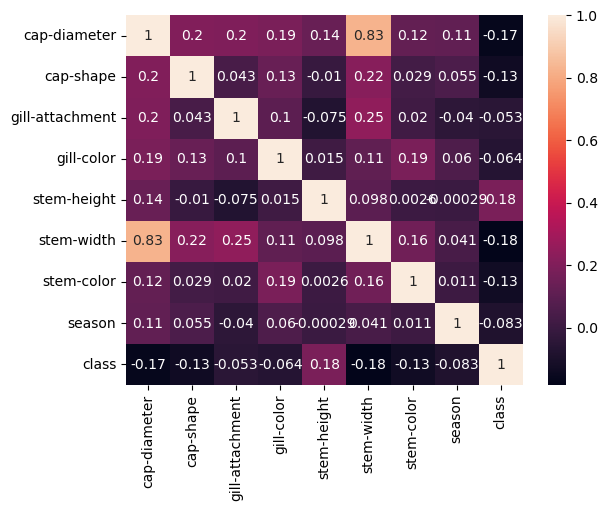

In [7]:
corr1 = df.corr()
sns.heatmap(corr1, annot =True)

In [8]:
mm = MinMaxScaler()

In [9]:
df = pd.DataFrame(mm.fit_transform(df), columns=df.columns)
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,0.725542,0.333333,0.333333,0.909091,0.992737,0.432894,0.916667,1.000000,1.0
1,0.772607,0.333333,0.333333,0.909091,0.992737,0.436257,0.916667,1.000000,1.0
2,0.725013,0.333333,0.333333,0.909091,0.941896,0.438778,0.916667,1.000000,1.0
3,0.666843,1.000000,0.333333,0.909091,0.987549,0.438778,0.916667,1.000000,1.0
4,0.690111,1.000000,0.333333,0.909091,0.967835,0.410199,0.916667,0.515404,1.0


In [10]:
x = df.iloc[:, 1:-1]
y = df['class']

In [11]:
start_time = time.strftime("%H:%M:%S")
print("Start Time:", start_time)
listy1 = []
listy2 = []
for i in range (10):
    lr = LogisticRegression(C = 0.01)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=i)
    cvv = cross_val_score(lr, x_train, y_train, cv = 5, scoring='accuracy')
    model1 = lr.fit(x_train, y_train)
    y_pred1 = model1.predict(x_test)
    acc1 = accuracy_score(y_test, y_pred1)
    cm1 = confusion_matrix(y_test, y_pred1)
    listy1.append(acc1)
    print(cvv, cvv.mean())
end_time = time.strftime('%H:%M:%S')
print("End Time:", end_time)
print(max(listy1))
#sns.heatmap(cm1, fmt='.2f', annot=True)
print(cvv, cvv.mean())

Start Time: 08:49:04
[0.63524211 0.62266091 0.63777504 0.63582151 0.64075673] 0.6344512596728441
[0.64120489 0.63150319 0.63181164 0.63345671 0.63592433] 0.6347801520688136
[0.63955999 0.63849476 0.63150319 0.62893276 0.63242854] 0.6341838461857359
[0.62866249 0.6381863  0.64044828 0.63109192 0.63654123] 0.6349860443659086
[0.62814845 0.63849476 0.63972856 0.63201727 0.63828912] 0.6353356333857134
[0.64089647 0.64034547 0.62965248 0.63016656 0.63181164] 0.6345745240289176
[0.63544772 0.63643841 0.6303722  0.63386798 0.64147645] 0.6355205542314861
[0.63112984 0.63283981 0.63828912 0.6363356  0.63201727] 0.6341223292238378
[0.64120489 0.63479334 0.6280074  0.63582151 0.64065392] 0.6360962121140532
[0.63925157 0.62811022 0.63448489 0.6375694  0.63314826] 0.6345128675392185
End Time: 08:49:11
0.6476683937823834
[0.63925157 0.62811022 0.63448489 0.6375694  0.63314826] 0.6345128675392185


In [12]:
y_prob1 = model1.predict_proba(x_test)[:, 1]

In [13]:
fpr1, tpr1, threshold = roc_curve(y_test, y_prob1)

In [14]:
threshold.size

2337

<function auc at 0x000001909666F670>


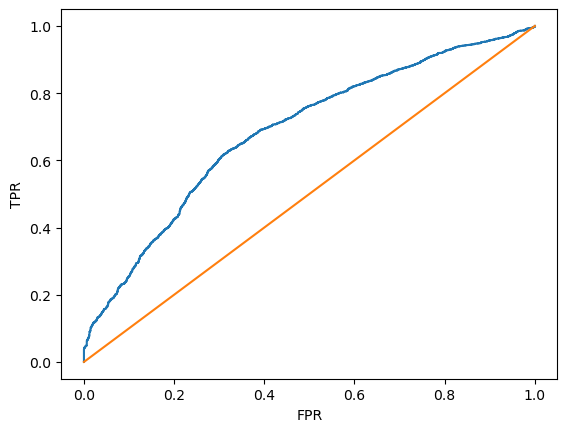

In [16]:
plt.plot(fpr1, tpr1)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
print(auc)